# Predictive Texting with NLTK (plus some ideas for more NLP projects)

The goal today is to provide an overview of common natural language processing tools, and to illustarte schematically how to accomplish some basic data science tasks (e.g. predictive text, document retrieval, etc).  Shown below is a data flow diagram illustrating how to translate raw text (e.g. from the web) into usable data science models and tools.  Shown in blue is a process that can predict the next word in a sequence, something that our smartphones do for us while texting.  Some code to accomplish this (in a pretty simple way) is included below.

Here is a version of that built in R - https://brighteyeanalytics.shinyapps.io/ShinyApp/ - the code used to generate this is available in this repo as well if you are interested.  

![alt text](NLP.jpeg "NLP Flow")

In [18]:
##If you are missing any of these install first via conda or pip
import os
import nltk
import sys
import random
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
#import word2vec #Note that you need to pip install this, it's not in anaconda

In [2]:
##Setting the working directory to the data folder and check it
#os.chdir('/home/ltmico/Hack/HackUDataScienceInTheWIld/NLP/final/en_US')
print(os.getcwd())

/home/ltmico/Hack/HackUDataScienceInTheWIld/NLP


In [9]:
##Reads in the data and cleans the non-ascii characters
textdoc = "./en_US.twitter.txt"
rawdoc = open(textdoc, 'r')

##Always set the seed for reproducibility while developing
random.seed(1)

##Samples the data so we only read 1% of the file to make it manageable
##It also removes the non-ascii characters in python 2.7 - doesn't work in 3.5 unfortunately
op=open("./asciidoc.txt",'w')
for line in rawdoc:
        if random.uniform(0,1) <= .01 :
            #line=line.strip().decode("ascii","ignore").encode("ascii")
            #if line=="":continue
            op.write(line)
rawdoc.close()
op.close()

#Read in the data to a string
textdoc = "./asciidoc.txt"
rawdoc = open(textdoc, 'r')
docs = rawdoc.read()
print(sys.getsizeof(docs))

6550528


In [10]:
##Convert to lower case
docs = docs.lower()

## Tokenize the data
print('tokenizing....')
##This treats the punctuation as it's own token
tokens = nltk.wordpunct_tokenize(docs)
print(tokens[0:10])

tokenizing....
['desk', 'put', 'together', ',', 'room', 'all', 'set', 'up', '.', 'oh']


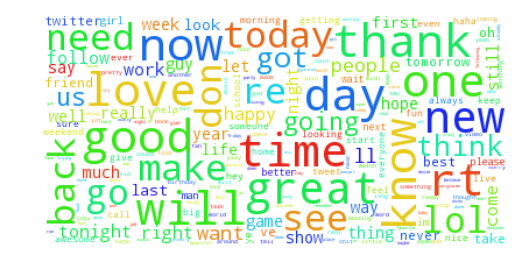

In [11]:
wc = WordCloud(background_color="white", max_words=2000, max_font_size=40, random_state=42)
cloudText = " ".join(tokens)
wc.generate(cloudText)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [16]:
##Generate the trigrams
from nltk.collocations import *

trigram_measures = nltk.collocations.TrigramAssocMeasures()
finderT = TrigramCollocationFinder.from_words(tokens)

##This computest the frequency of occurrence for the trigrams 
scoredT = finderT.score_ngrams(trigram_measures.raw_freq)
#type(scoredT)
df = pd.DataFrame(scoredT)
df.head()


,0,1
0,"(i, ', m)",0.003400
1,"(it, ', s)",0.002276
2,"(don, ', t)",0.001928
3,"(can, ', t)",0.001248
4,"(you, ', re)",0.001041


To test out the prediction, change the text below and see what you get (after running the cells below of course).  Note that because this only uses trigrams, there may be some combinations of input that don't generate a response.  How would you improve that?

In [13]:
##Here is the test input
sentence  = "this class is"
print(sentence + '....')


this class is....


In [14]:
##Processes the sentence in the same way as the corpus
sentence = sentence.lower()
tokSent = nltk.wordpunct_tokenize(sentence)
input =  tokSent[-2:]

##This sorts the entire list and removes the frequencies
##I don't actually need this but it might be useful later
tempSort = sorted(trigram for trigram, score in scoredT)

##Matches the input to the first two tokens of the trrigram
##Then sorts the results in order of freqeuncy
matches = [(trigram, score) for (trigram, score) in scoredT if trigram[:2] == tuple(input)]

##Generates a guess for the next word
guess = matches[0][0][2]
print('Best guess for the next word is: ' + guess)

Best guess for the next word is: just


In [ ]:
#Decompose the tuple of tuples into just the guesses
#test1, test2 = zip(*matches)
test1, test2 = zip(*matches)
temp1,temp2,temp3 = zip(*test1)
cloudText = " ".join(temp3)

As an experiment consider trying to build a new wordcloud with the different guesses extracted in the cell above.

In [ ]:
###Try building a new word cloud.....